# Detect Melanoma
**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Import Libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [30]:
train_path="/content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train"
test_path="/content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Test"

data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# 2. Data Preparation


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Train Data Set Creation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)
  

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
# Validation Data Set Creation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# 3. Visualize the data

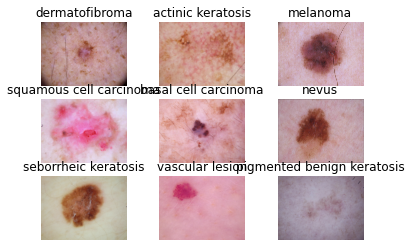

In [10]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Model Creation

## Model 0


In [12]:
# Creating the model
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [13]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 408s 1s/step - loss: 3.1948 - accuracy: 0.1775 - val_loss: 2.1011 - val_accuracy: 0.1902
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.9948 - accuracy: 0.2372 - val_loss: 1.9514 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.8306 - accuracy: 0.3359 - val_loss: 1.6695 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6174 - accuracy: 0.4342 - val_loss: 1.5905 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4830 - accuracy: 0.4855 - val_loss: 1.5229 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3810 - accuracy: 0.5145 - val_loss: 1.4469 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3159 - accuracy: 0.5452 - val_loss: 1.4801 - val_accuracy: 0.4966
Epoch 8/20
56

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

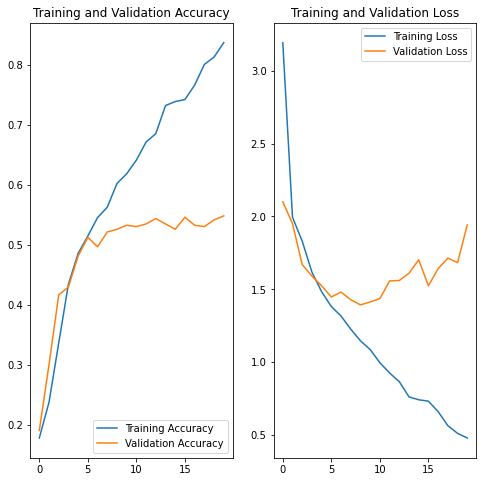

In [16]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- Training accuracy = 83% 
- Validation accuracy = 54% 
- It is not in par with the training accuracy.
- The validation loss as observed is very high.
- Indicative of some Overfit in the model.
- We could add some Dropout layers and remove the BatchNormalization layers.
- And by adding a few more layers, we could improve the accuracy by trying to extract more features.


## Model 1

In [17]:
#Creating the Model
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [18]:
# Compiling the model
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [19]:
# Training the model
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 106ms/step - loss: 2.2740 - accuracy: 0.1775 - val_loss: 2.0637 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0616 - accuracy: 0.1953 - val_loss: 2.0375 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0291 - accuracy: 0.1853 - val_loss: 2.0087 - val_accuracy: 0.2081
Epoch 4/20
56/56 [==============================] - 5s 95ms/step - loss: 1.9824 - accuracy: 0.2104 - val_loss: 1.9304 - val_accuracy: 0.2438
Epoch 5/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9372 - accuracy: 0.2383 - val_loss: 1.9062 - val_accuracy: 0.2148
Epoch 6/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9155 - accuracy: 0.2706 - val_loss: 1.8836 - val_accuracy: 0.3177
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.9197 - accuracy: 0.2690 - val_loss: 1.8527 - val_accuracy: 0.3244
Epoch 8/20
5

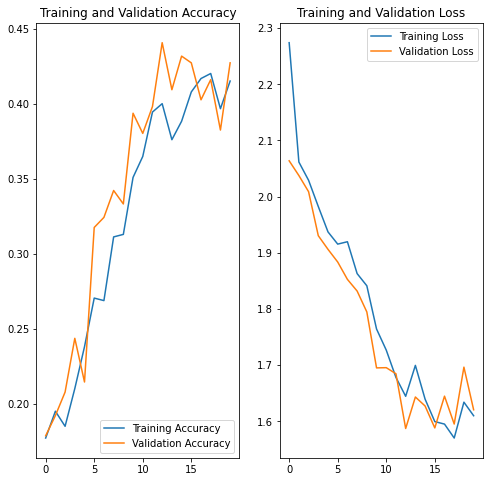

In [20]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- Training Accuracy = 41%.
- Validation Accuracy = 43%.
- This is a much better model compared to the previous model as there seems to be No Overfit.

# 5. Data Augmentation

In [21]:
# Specifying the Augmentation
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

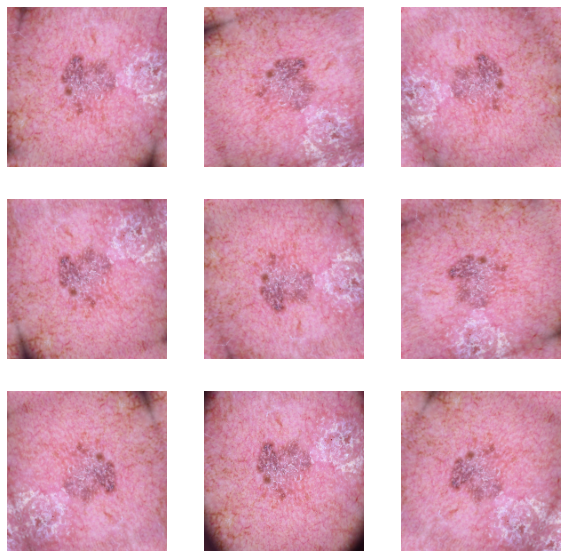

In [22]:
# Visualizing the Augmented Data
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

# 6. Model 2

In [23]:
# Creating the Model
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [24]:
# Compiling the model
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [25]:
# Training the model
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 117ms/step - loss: 2.1188 - accuracy: 0.2015 - val_loss: 2.0356 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 6s 113ms/step - loss: 2.0418 - accuracy: 0.1903 - val_loss: 2.0270 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 6s 114ms/step - loss: 2.0364 - accuracy: 0.2059 - val_loss: 2.0284 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 6s 114ms/step - loss: 2.0387 - accuracy: 0.1881 - val_loss: 2.0213 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 6s 114ms/step - loss: 2.0388 - accuracy: 0.1964 - val_loss: 2.0196 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 6s 113ms/step - loss: 2.0082 - accuracy: 0.2160 - val_loss: 1.9944 - val_accuracy: 0.2506
Epoch 7/20
56/56 [==============================] - 6s 113ms/step - loss: 1.9295 - accuracy: 0.2773 - val_loss: 1.8574 - val_accuracy: 0.2886
Epoch 

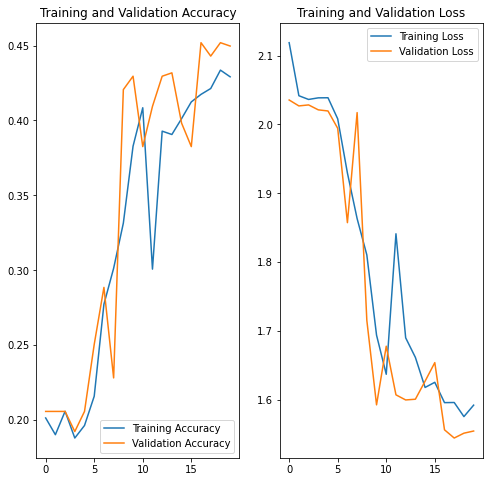

In [26]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- Training accuracy = 42%.
- Validation accuracy = 44%.
- This is a much better model compared to the previous two models as there seems to be No Overfit.
- Data Augmentation has improved the model performance.

# 7. Checking for Class Imbalance

In [47]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


- The samples of various classes are not in equal proportion.
- There is a significant Class Imbalance observed.
- The class with the least number of samples is Seborrheic Keratosis with 77.
- The class that dominates the data in terms of proportionate number of samples is Pigmented Benign Keratosis with sample size of 462.

# 8. Using Augmentor for Class Imbalance Treatment

In [28]:
# Installing Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# Using Augmentor
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9D8DBD340>: 100%|██████████| 500/500 [00:17<00:00, 28.99 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE9D8D07910>: 100%|██████████| 500/500 [00:18<00:00, 27.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9D8D0E4F0>: 100%|██████████| 500/500 [00:17<00:00, 27.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FE9D8E16D30>: 100%|██████████| 500/500 [01:26<00:00,  5.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FE9D8CD8A30>: 100%|██████████| 500/500 [01:17<00:00,  6.47 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9EC35E9A0>: 100%|██████████| 500/500 [00:17<00:00, 28.26 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FEACA467EE0>: 100%|██████████| 500/500 [00:39<00:00, 12.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9D8D48FD0>: 100%|██████████| 500/500 [00:17<00:00, 28.40 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/PG_AI_ML/TestData/skin-cancer-data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9D8D874F0>: 100%|██████████| 500/500 [00:17<00:00, 28.39 Samples/s]


In [34]:
# Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [39]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    directory_out =train_path+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


### Observations:
- The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.

# 9. Modelling Augmented Data

In [40]:
batch_size = 32
img_height = 180
img_width = 180

In [41]:
# Creating the Train Data Set
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [42]:
# Creating the Validation Data Set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# 10. Model 3


In [43]:
# Creating the Model
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [44]:
# Compiling the Model
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [45]:
# Training the Model
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 34s 193ms/step - loss: 2.3669 - accuracy: 0.1534 - val_loss: 2.0330 - val_accuracy: 0.2829
Epoch 2/30
169/169 [==============================] - 30s 172ms/step - loss: 1.8049 - accuracy: 0.3197 - val_loss: 1.6019 - val_accuracy: 0.4254
Epoch 3/30
169/169 [==============================] - 30s 174ms/step - loss: 1.5430 - accuracy: 0.4125 - val_loss: 1.3691 - val_accuracy: 0.4922
Epoch 4/30
169/169 [==============================] - 30s 174ms/step - loss: 1.4124 - accuracy: 0.4594 - val_loss: 1.3728 - val_accuracy: 0.4662
Epoch 5/30
169/169 [==============================] - 32s 184ms/step - loss: 1.2963 - accuracy: 0.5106 - val_loss: 1.1074 - val_accuracy: 0.5702
Epoch 6/30
169/169 [==============================] - 30s 174ms/step - loss: 1.2005 - accuracy: 0.5371 - val_loss: 1.0794 - val_accuracy: 0.6065
Epoch 7/30
169/169 [==============================] - 32s 183ms/step - loss: 1.0756 - accuracy: 0.5909 - val_loss: 1.1127 - val_ac

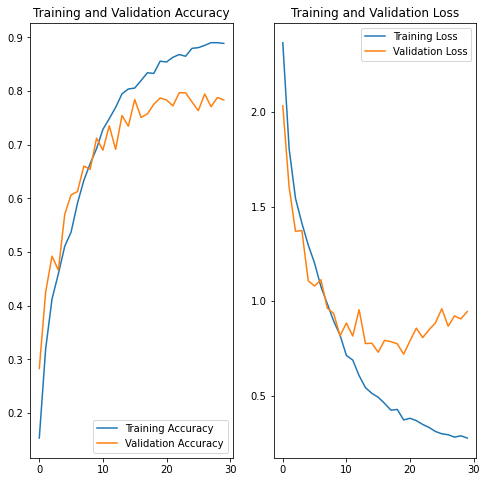

In [46]:
#Visualizing the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- Training accuracy = ~88%.
- Validation accuracy = ~78%.
- Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.
- Much better models could be built or tried out using more epochs and more layers.